In [1]:
import pandas as pd
import numpy as np 

from glob import glob
import cv2
import matplotlib.pylab as plt

In [2]:
# Read the images
# dogpic = glob('/Users/victorhuang/Documents/CSE 410/dogpic.jpeg')


In [3]:
config_file = '/Users/victorhuang/Documents/CSE 410/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = '/Users/victorhuang/Documents/CSE 410/frozen_inference_graph.pb'


In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classlabels = []
file_name = 'Labels.txt'
with open(file_name) as fpt:
  classlabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classlabels)
print(len(classlabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7fba2386ccb0>

## Read an Image

In [8]:
img = cv2.imread('manwithbmw2.jpg')

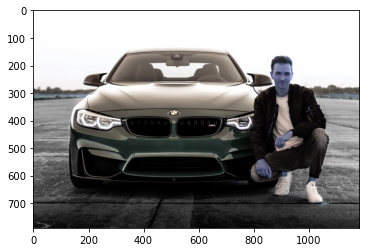

In [9]:
plt.imshow(img);

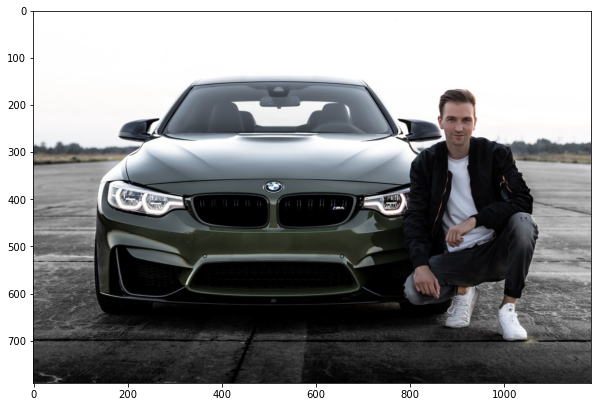

In [10]:
plt.figure(figsize = (10,10))

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold = 0.5)

In [12]:
print(ClassIndex)

[[1]
 [3]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

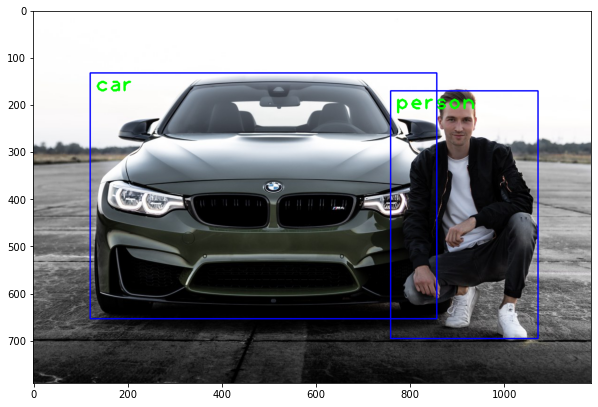

In [14]:
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


## Apply to Video 

In [18]:
# import VideoCapture
cap = cv2.VideoCapture("NYC.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 12
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold = 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes, (255,0,0),2)
                cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0))
    
    cv2.imshow('Output', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[3]
 [3]]
[[3]]
()
()
[[3]
 [3]]
[[3]]
[[3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]]
[[3]]
[[3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]]
[[3]
 [3]
 [1]]
[[3]
 [3]
 [1]]
[[3]
 [3]
 [1]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [1]]
[[3]
 [3]]
[[3]
 [1]
 [3]]
[[3]]
[[3]
 [1]]


KeyboardInterrupt: 

In [20]:
pip install imageAI



SyntaxError: invalid syntax (3734756974.py, line 1)